In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv("data.csv")
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
df.shape

(195, 24)

In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

<AxesSubplot:>

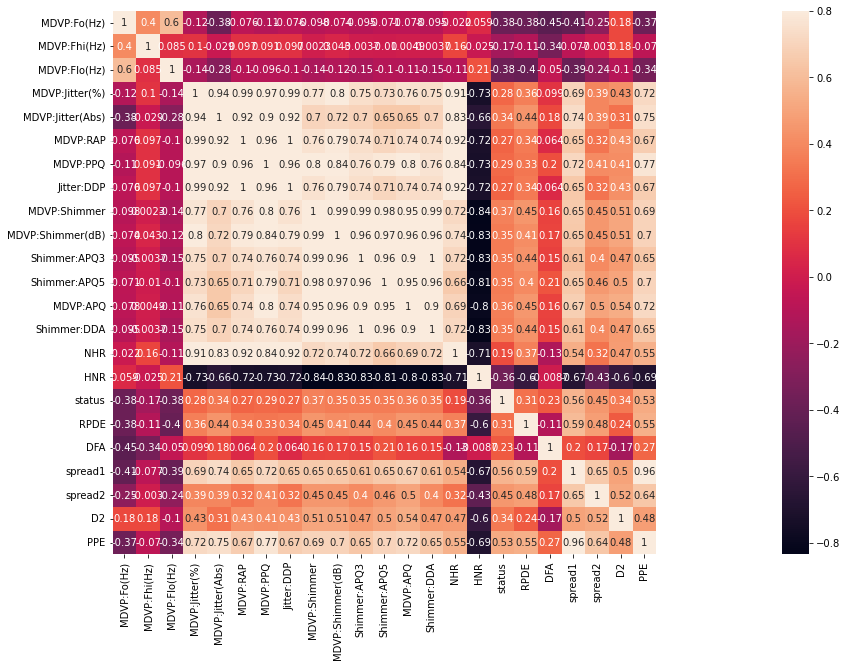

In [7]:
corrmat = df.corr()
fig = plt.figure(figsize = (45, 10))
sns.heatmap(corrmat, vmax = 0.8, square = True,annot=True)

MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
HNR                 0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

In [9]:
new_df = df[relevant_features.index]

In [10]:
l=["MDVP:Fo(Hz)","MDVP:Flo(Hz)","HNR","spread1","D2"]
m=new_df[l]
print(m)

     MDVP:Fo(Hz)  MDVP:Flo(Hz)     HNR   spread1        D2
0        119.992        74.997  21.033 -4.813031  2.301442
1        122.400       113.819  19.085 -4.075192  2.486855
2        116.682       111.555  20.651 -4.443179  2.342259
3        116.676       111.366  20.644 -4.117501  2.405554
4        116.014       110.655  19.649 -3.747787  2.332180
..           ...           ...     ...       ...       ...
190      174.188        94.261  19.517 -6.538586  2.657476
191      209.516        89.488  19.147 -6.195325  2.784312
192      174.688        74.287  17.883 -6.787197  2.679772
193      198.764        74.904  19.020 -6.744577  2.138608
194      214.289        77.973  21.209 -5.724056  2.555477

[195 rows x 5 columns]


In [11]:
scaler=MinMaxScaler((-1,1))
m=scaler.fit_transform(m)
#print(m)

In [12]:
d={}
values=[[] for i in range(5)]
for i in range(len(m)):
  for j in range(5):
    values[j].append(m[i][j])
for i in range(5):
  d[l[i]]=values[i]

df_trans=pd.DataFrame(d)
print(df_trans)

     MDVP:Fo(Hz)  MDVP:Flo(Hz)       HNR   spread1        D2
0      -0.631383     -0.890370  0.023490  0.139750 -0.218677
1      -0.603346     -0.443354 -0.134845  0.406554 -0.053710
2      -0.669923     -0.469423 -0.007559  0.273489 -0.182361
3      -0.669993     -0.471599 -0.008128  0.391255 -0.126046
4      -0.677701     -0.479786 -0.089003  0.524944 -0.191329
..           ...           ...       ...       ...       ...
190    -0.000361     -0.668555 -0.099732 -0.484213  0.098097
191     0.410975     -0.723514 -0.129806 -0.360089  0.210947
192     0.005461     -0.898546 -0.232545 -0.574111  0.117935
193     0.285786     -0.891441 -0.140128 -0.558699 -0.363556
194     0.466549     -0.856103  0.037796 -0.189677  0.007346

[195 rows x 5 columns]


In [13]:

new_df['MDVP:Fo(Hz)']=values[0]
new_df['MDVP:Flo(Hz)']=values[1]
new_df['HNR']=values[2]
new_df['spread1']=values[3]
new_df['D2']=values[4]
print(new_df)


     MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
0      -0.631383     -0.890370         0.00784           0.00007   0.00370   
1      -0.603346     -0.443354         0.00968           0.00008   0.00465   
2      -0.669923     -0.469423         0.01050           0.00009   0.00544   
3      -0.669993     -0.471599         0.00997           0.00009   0.00502   
4      -0.677701     -0.479786         0.01284           0.00011   0.00655   
..           ...           ...             ...               ...       ...   
190    -0.000361     -0.668555         0.00459           0.00003   0.00263   
191     0.410975     -0.723514         0.00564           0.00003   0.00331   
192     0.005461     -0.898546         0.01360           0.00008   0.00624   
193     0.285786     -0.891441         0.00740           0.00004   0.00370   
194     0.466549     -0.856103         0.00567           0.00003   0.00295   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shim

In [14]:
x=new_df.drop(['status'],axis=1)
y=new_df['status']
print(x.shape)

(195, 20)


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [16]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print(classification_report(y_test,y_pred))
accuracy1=gbc.score(x_test,y_test)
print (accuracy1*100,'%')
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_pred=y_pred.tolist()
y_test=y_test.tolist()
print("\n")
print("ACTUAL\tPREDICTED")
for i in range(len(y_test)):
  print(str(y_test[i])+"\t"+str(y_pred[i]))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

94.87179487179486 %
[[ 5  2]
 [ 0 32]]


ACTUAL	PREDICTED
0	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
0	0
1	1
1	1
0	0
1	1
1	1
1	1
0	0
0	0
1	1
1	1
1	1
1	1
1	1
1	1
1	1
0	0
1	1
1	1
1	1
1	1
1	1
1	1
1	1
0	1
1	1
1	1
1	1
1	1


In [17]:
des_class=DecisionTreeClassifier()
des_class.fit(x_train,y_train)
des_predict=des_class.predict(x_test)
print(classification_report(y_test,des_predict))
accuracy3=des_class.score(x_test,y_test)
print(accuracy3*100,'%')
cm = confusion_matrix(y_test, des_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.93      0.88      0.90        32

    accuracy                           0.85        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.87      0.85      0.85        39

84.61538461538461 %
[[ 5  2]
 [ 4 28]]


In [18]:
nvclassifier = GaussianNB ()
nvclassifier .fit(x_train,y_train)
y_pred=nvclassifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_pred,y_test)*100,'%')
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.92      0.75      0.83        32

    accuracy                           0.74        39
   macro avg       0.65      0.73      0.66        39
weighted avg       0.83      0.74      0.77        39

74.35897435897436 %
[[ 5  2]
 [ 8 24]]


In [19]:
inp=[[119.992,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]]
inp1=[[201.464,195.708,0.00198,0.00001,0.00105,0.00115,0.00314,0.01194,0.107,0.00586,0.0076,0.00957,0.01758,31.732,0.344252,0.742737,-7.777685,0.170183,2.447064,0.05761]]
output=gbc.predict(scaler.fit_transform(inp1))
if output==1:
  print("Parkinsons Disease predicted")
else:
  print("Healthy")

Healthy
